<img src="http://akhavanpour.ir/notebook/images/srttu.gif" alt="SRTTU" style="width: 150px;"/>

[![Azure Notebooks](https://notebooks.azure.com/launch.png)](https://notebooks.azure.com/import/gh/Alireza-Akhavan/class.vision)


# Book Recommendation System

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سیستم توصیه گر کتاب</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
کدها برگرفته از مستندات بلاگ :</div>

[https://towardsdatascience.com/building-a-book-recommendation-system-using-keras-1fba34180699
](https://towardsdatascience.com/building-a-book-recommendation-system-using-keras-1fba34180699)



<div style="direction:rtl;text-align:right;font-family:Tahoma">
و کدهای موجود در مخزن کد:</div>

[https://github.com/TannerGilbert/Articles](https://github.com/TannerGilbert/Articles)


<div style="direction:rtl;text-align:right;font-family:Tahoma">
است<br>
</div>


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
کدها برگرفته از مستندات بلاگ :</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
مجموعه داده‌ی استفاده شده در این نوت بوک   goodbooks-10k سایت Kaggle است.
</div>

[https://www.kaggle.com/zygmunt/goodbooks-10k](https://www.kaggle.com/zygmunt/goodbooks-10k)


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
ویژگی های موجود در دیتاست:</div>

        -book_id
        -user_id
        -rating

In [15]:
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model


In [16]:
dataset = pd.read_csv('https://github.com/Alireza-Akhavan/datasets_and_models/raw/main/ratings.csv')

In [17]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [18]:
dataset.shape

(981756, 3)

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [20]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [21]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [22]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [23]:
n_books = len(dataset.book_id.unique())
n_books

10000

<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدلی که خواهیم داشت از اجزای اصلی زیر تشکیل خواهد شد</div>

    -Input: Input for both books and users
    -Embedding Layers: Embeddings for books and users
    -Dot: combines embeddings using a dot product

In [33]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [34]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Book-Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 User-Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Book-Embedding (Embedding)  (None, 1, 5)                 50005     ['Book-Input[0][0]']          
                                                                                                  
 User-Embedding (Embedding)  (None, 1, 5)                 267125    ['User-Input[0][0]']          
                                                                                            

In [35]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 14s 2ms/step - loss: 15.8283


15.828289031982422

In [36]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

for i in range(0,10):
   print(predictions[i], test.rating.iloc[i])

1/1 [==============================] - 0s 57ms/step
[2.3068336e-05] 5
[-0.00092155] 4
[-0.00312227] 3
[-8.4236366e-05] 5
[0.00050229] 3
[0.00033401] 3
[-0.00278908] 3
[-1.9127208e-05] 4
[-0.00223821] 3
[0.00169448] 5


Epoch 1/10
24544/24544 [==============================] - 104s 4ms/step - loss: 13.6461
Epoch 2/10
24544/24544 [==============================] - 101s 4ms/step - loss: 4.5767
Epoch 3/10
24544/24544 [==============================] - 101s 4ms/step - loss: 1.8401
Epoch 4/10
24544/24544 [==============================] - 102s 4ms/step - loss: 1.2208
Epoch 5/10
24544/24544 [==============================] - 102s 4ms/step - loss: 0.9730
Epoch 6/10
24544/24544 [==============================] - 103s 4ms/step - loss: 0.8442
Epoch 7/10
24544/24544 [==============================] - 102s 4ms/step - loss: 0.7690
Epoch 8/10
24544/24544 [==============================] - 103s 4ms/step - loss: 0.7218
Epoch 9/10
24544/24544 [==============================] - 102s 4ms/step - loss: 0.6899
Epoch 10/10
24544/24544 [==============================] - 102s 4ms/step - loss: 0.6674


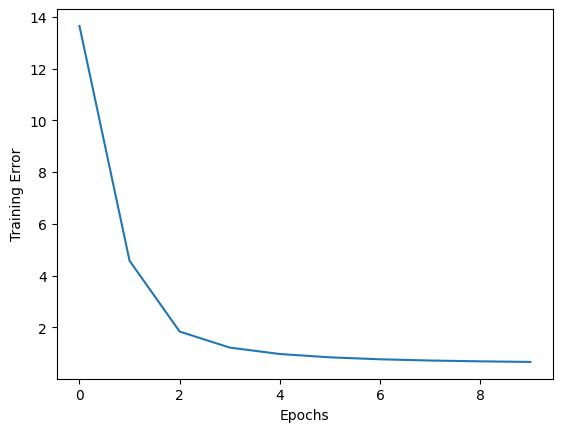

In [37]:
from keras.models import load_model
import os

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [38]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 16s 3ms/step - loss: 0.9603


0.9602550268173218

In [39]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

1/1 [==============================] - 0s 21ms/step
[5.2514153] 5
[3.7159991] 4
[3.7052584] 3
[3.8982012] 5
[3.5516946] 3
[3.5172405] 3
[2.9716544] 3
[4.7415504] 4
[4.4628468] 3
[3.9871783] 5


[None, None, None, None, None, None, None, None, None, None]